## **ALP DATA MINING -- ASSCOCIATION RULES MINING**
### **GROUP 15** 
1. Tsania Candraningtyas - 0706022310055 
2. Michellee Jeaneth Liang - 0706022310050
3. Tiffany Christabel A. - 0706022310041

### **Hotel Booking Demand**
Link dataset : https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

#### Dataset Description
Dataset yang digunakan adalah Hotel Booking Demand Dataset yang
bersumber dari Kaggle. Dataset ini berisi data pemesanan hotel antara
tahun 2015 hingga 2017 dengan total lebih dari 119.000 baris dan 32 kolom.

#### Business Objective
Tujuan dari proyek ini adalah untuk menganalisis pola pemesanan hotel
menggunakan Association Rule Mining (ARM). Analisis ini bertujuan
menemukan kombinasi karakteristik pemesanan yang sering muncul
bersamaan sehingga dapat membantu manajemen hotel dalam
pengambilan keputusan strategis, seperti promosi, pengelolaan reservasi,
dan segmentasi pelanggan.

#### Attribute Description
- hotel: Tipe hotel (City Hotel atau Resort Hotel)
- is_canceled: Status pembatalan (0 = tidak dibatalkan, 1 = dibatalkan)
- lead_time: Jumlah hari antara pemesanan dan tanggal kedatangan
- arrival_date_year: Tahun kedatangan
- arrival_date_month: Bulan kedatangan
- stays_in_weekend_nights: Jumlah malam akhir pekan
- stays_in_week_nights: Jumlah malam hari kerja
- adults: Jumlah tamu dewasa
- children: Jumlah anak
- babies: Jumlah bayi
- meal: Tipe paket makan
- market_segment: Segmen pasar pemesanan
- distribution_channel: Kanal distribusi pemesanan
- reserved_room_type: Tipe kamar yang dipesan
- adr: Average Daily Rate

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

## **Data Understanding**

In [4]:
url = 'https://raw.githubusercontent.com/TsaniaCandraningtyas/ALP-DATA-MINING/refs/heads/main/hotel_bookings.csv'
df = pd.read_csv(url)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## **Data Preparation**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

In [7]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
numerical_cols = [
    'lead_time',
    'adr',
    'stays_in_weekend_nights',
    'stays_in_week_nights'
]

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

## **Exploratory Data Analysis (EDA)**

### **Meal Distribution**

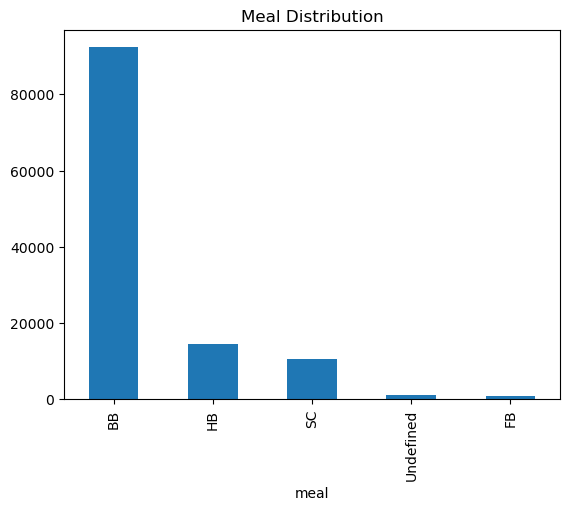

In [9]:
df['meal'].value_counts().plot(kind='bar')
plt.title('Meal Distribution')
plt.show()

The graph shows that Bed & Breakfast (BB) is the most commonly chosen meal plan, leaving the other meal plans far behind. This indicates that most guests prefer a basic meal package that includes only breakfast. Half Board (HB) and Self Catering (SC) have moderate demand, while Undefined and Full Board (FB) are rarely selected as meal plans. Overall, this suggests that guests prefer flexibility rather than a full meal package.

### **Booking Cancellation Distribution**

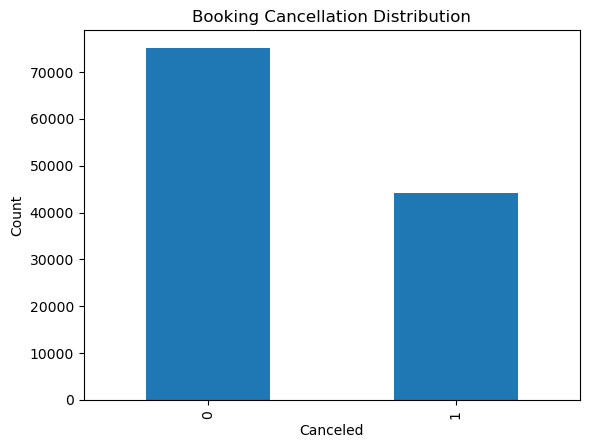

In [10]:
df['is_canceled'].value_counts().plot(kind='bar')
plt.title('Booking Cancellation Distribution')
plt.xlabel('Canceled')
plt.ylabel('Count')
plt.show()

This bar chart shows the distribution of booking cancellations, where 0 represents not canceled and 1 represents canceled booking. The result shows that most booking are not canceled, while significant portion of booking are canceled. Overall, this large number of canceled bookings need to be reviewed in order to reduce potential revenue loss.

### **Hotel Type Distribution**

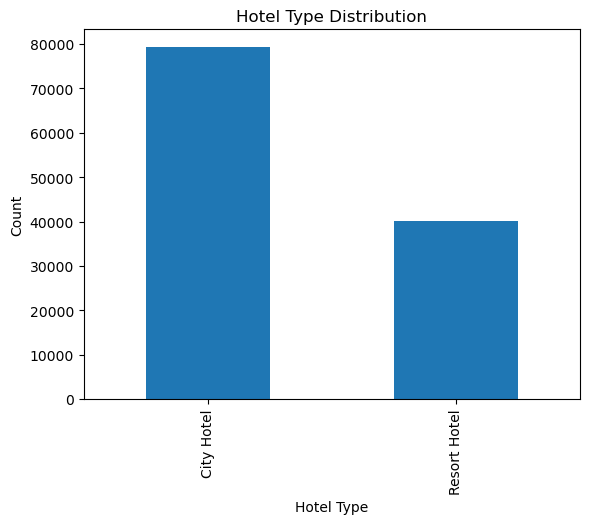

In [11]:
df['hotel'].value_counts().plot(kind='bar')
plt.title('Hotel Type Distribution')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

The bar chart shows the distribution of bookings by hotel type. This indicates that City Hotel has significantly more bookings than Resort Hotel. This suggest that guests are more likely to stay in city hotels, possibly due to accessibility and travel purpose. Overall, highlighting higher popularity and demand for City Hotel compared to Resort Hotel.

### **Correlation Matrix of Numerical Features**

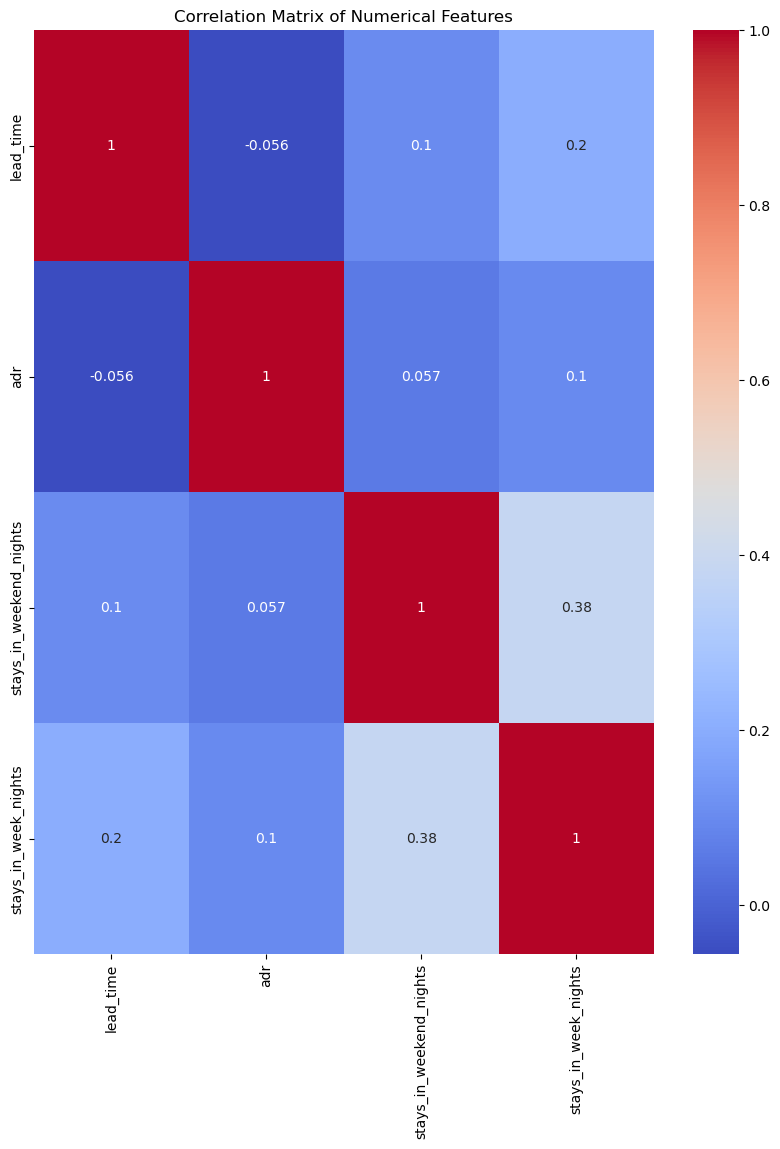

In [26]:
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The correlation matrix mostly shows weak relationship among numerical variables. The strongest correlation is between stays in weekend nights and stays in week nights, indicating longer stays tend to iclude both weekdays and weekends. While, lead time and ADR shows very weak correlations, suggesting limited linear relationship between them.

## **Feature Engineering**

In [13]:
df_arm = df[['hotel', 'meal', 'market_segment', 
             'distribution_channel', 'reserved_room_type']]

In [14]:
transactions = df_arm.astype(str).values.tolist()

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()

,A,Aviation,B,BB,C,City Hotel,Complementary,Corporate,D,Direct,...,H,HB,L,Offline TA/TO,Online TA,P,Resort Hotel,SC,TA/TO,Undefined
0,False,False,False,True,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,True,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,True,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,True,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False


## **Model Complexity**

In [15]:
# Konfigurasi 1
freq_items_1 = apriori(df_encoded, min_support=0.02, use_colnames=True)
rules_1 = association_rules(freq_items_1, metric="confidence", min_threshold=0.6)

# Konfigurasi 2
freq_items_2 = apriori(df_encoded, min_support=0.01, use_colnames=True)
rules_2 = association_rules(freq_items_2, metric="confidence", min_threshold=0.7)

print("Rules config 1:", rules_1.shape)
print("Rules config 2:", rules_2.shape)

Rules config 1: (448, 10)
Rules config 2: (457, 10)


## **Association Rules Mining**

In [16]:
frequent_itemsets = apriori(
    df_encoded,
    min_support=0.05,
    use_colnames=True
)

frequent_itemsets.sort_values(by='support', ascending=False).head()

,support,itemsets
13,0.819750,(TA/TO)
1,0.773180,(BB)
0,0.720278,(A)
2,0.664461,(City Hotel)
33,0.617405,"(TA/TO, BB)"


In [17]:
rules = association_rules(
    frequent_itemsets,
    metric='confidence',
    min_threshold=0.7
)

rules = rules.sort_values(by=['confidence', 'lift'], ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
162,"(SC, Online TA, A)",(City Hotel),0.081456,0.664461,0.081397,0.999280,1.503896,0.027273,466.159525,0.364773
255,"(TA/TO, SC, Online TA, A)",(City Hotel),0.080962,0.664461,0.080903,0.999276,1.503889,0.027107,463.331411,0.364574
108,"(SC, Online TA)",(City Hotel),0.082578,0.664461,0.082478,0.998783,1.503147,0.027608,275.673242,0.364859
221,"(TA/TO, SC, Online TA)",(City Hotel),0.081967,0.664461,0.081866,0.998774,1.503134,0.027403,273.632046,0.364609
268,"(Online TA, City Hotel, BB, D)",(TA/TO),0.073884,0.819750,0.073792,0.998753,1.218362,0.013225,144.543795,0.193524


## **MODEL EVALUATION**

In [18]:
strong_rules = rules[(rules['confidence'] >= 0.7) & (rules['lift'] > 1)]
strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
162,"(SC, Online TA, A)",(City Hotel),0.081397,0.999280,1.503896
255,"(TA/TO, SC, Online TA, A)",(City Hotel),0.080903,0.999276,1.503889
108,"(SC, Online TA)",(City Hotel),0.082478,0.998783,1.503147
221,"(TA/TO, SC, Online TA)",(City Hotel),0.081866,0.998774,1.503134
268,"(Online TA, City Hotel, BB, D)",(TA/TO),0.073792,0.998753,1.218362
...,...,...,...,...,...
205,"(City Hotel, Online TA)","(TA/TO, BB)",0.229014,0.705636,1.142907
19,(Groups),(City Hotel),0.117053,0.705416,1.061637
21,(TA/TO),(City Hotel),0.577477,0.704455,1.060190
84,"(BB, D)",(Online TA),0.097496,0.702220,1.484464


In [19]:
for _, row in strong_rules.head(5).iterrows():
    print(f"Jika {set(row['antecedents'])} maka {set(row['consequents'])}")
    print(f"Support: {row['support']:.2f}, Confidence: {row['confidence']:.2f}, Lift: {row['lift']:.2f}\n")

Jika {'SC', 'Online TA', 'A'} maka {'City Hotel'}
Support: 0.08, Confidence: 1.00, Lift: 1.50

Jika {'TA/TO', 'SC', 'Online TA', 'A'} maka {'City Hotel'}
Support: 0.08, Confidence: 1.00, Lift: 1.50

Jika {'SC', 'Online TA'} maka {'City Hotel'}
Support: 0.08, Confidence: 1.00, Lift: 1.50

Jika {'TA/TO', 'SC', 'Online TA'} maka {'City Hotel'}
Support: 0.08, Confidence: 1.00, Lift: 1.50

Jika {'Online TA', 'City Hotel', 'BB', 'D'} maka {'TA/TO'}
Support: 0.07, Confidence: 1.00, Lift: 1.22



In [20]:
rules_2.sort_values(by='lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
371,"(TA/TO, G)","(Resort Hotel, Online TA)",0.012530,0.148497,0.010202,0.814171,5.482762,0.008341,4.582191,0.827985
418,"(TA/TO, SC)","(City Hotel, Online TA, A)",0.084865,0.218410,0.080903,0.953316,4.364796,0.062368,16.742214,0.842383
421,(SC),"(TA/TO, City Hotel, Online TA, A)",0.089203,0.216760,0.080903,0.906948,4.184109,0.061567,8.417259,0.835533
240,(SC),"(City Hotel, Online TA, A)",0.089203,0.218410,0.081397,0.912488,4.177864,0.061914,8.931256,0.835141
372,"(G, Online TA)","(Resort Hotel, TA/TO)",0.012254,0.242273,0.010202,0.832536,3.436351,0.007233,4.524711,0.717789


The model performed well in identifying meaningful association, lift values greater than 1.0 shows that the relationship are not random. Classification Model like Random Forest can be implemented to achieve higher business value.

## **CONCLUSION**

1. Model Interpretation
Based on Association Rule Mining performed using Apriori algorithm, here are several behaviour identified :
* "No Deposit" Dominance, shows strong association between Online TA (Travel Agents), Market Segment TA/TO, and the No Deposit. This indicates that vast majority of online bookings are made without upfront payment.
* Meal Preference Pattern, shows a consistent relation between City Hotel and BB (Bed & Breakfast) meal plan. This suggest that city guests prefer to have flexible lunch and dinner, choose to explore local food instead of eating at the hotel.

2. Business Insight
Here are several business insight that we've made :
* Risk Assessment : High frequency of "No Deposit" through Online Travel Agents suggest that hotel is highly exposed to "Last Minute Cancellation"
* Service Optimization : Since "City Hotel" and "BB / Bed & Breakfast" assosiation is so strong, hotel can optimize by focusing on breakfast buffet quality to make this consistent.

3. Recommendation
* Incentive for Direct Bookings : Reduce high dependency on Online Travel Agents, hotel should offer "Member only" rates for guests who directly booked through hotel's website.
* Cross-Selling Opportunities : Since guests frequently booked "Bed & Breakfast", hotel could provide vouchers or discounts for hotel restaurants to encourage more guests spend dinner at the hotel.